In [ ]:
#Instala a lib face_recognition
!pip install face_recognition

In [ ]:
#Cria diretorio conhecidos e baixa as imagens para ela
!mkdir conhecidos
!wget https://neoradar.uai.com.br/wp-content/uploads/sites/8/2020/05/shutterstock-1641527863-scaled-1280x720.jpg -O conhecidos/mascara.jpg
!wget https://conteudo.imguol.com.br/c/entretenimento/1a/2020/03/23/mascara-de-nao-tecido-coronavirus-1584992534058_v2_1x1.jpg -O conhecidos/mascara_2.jpg

--2021-11-29 23:42:49--  https://neoradar.uai.com.br/wp-content/uploads/sites/8/2020/05/shutterstock-1641527863-scaled-1280x720.jpg
Resolving neoradar.uai.com.br (neoradar.uai.com.br)... 200.188.178.248, 200.188.178.247
Connecting to neoradar.uai.com.br (neoradar.uai.com.br)|200.188.178.248|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47789 (47K) [image/jpeg]
Saving to: ‘conhecidos/mascara.jpg’

conhecidos/mascara. 100%[===================>]  46.67K   162KB/s    in 0.3s    

2021-11-29 23:42:51 (162 KB/s) - ‘conhecidos/mascara.jpg’ saved [47789/47789]

--2021-11-29 23:42:52--  https://conteudo.imguol.com.br/c/entretenimento/1a/2020/03/23/mascara-de-nao-tecido-coronavirus-1584992534058_v2_1x1.jpg
Resolving conteudo.imguol.com.br (conteudo.imguol.com.br)... 23.199.34.224, 104.116.243.160, 2600:9000:21c4:200:10:3798:4a80:93a1, ...
Connecting to conteudo.imguol.com.br (conteudo.imguol.com.br)|23.199.34.224|:443... connected.
HTTP request sent, awaiting response

In [ ]:
#Cria o diretorio desconhecidos e baixa as imagens 
!mkdir desconhecidos
!wget https://istoe.com.br/wp-content/uploads/sites/14/2021/05/faustao-2.jpg -O desconhecidos/1.jpg
!wget https://www.printi.com.br/blog/wp-content/uploads/2020/04/mascara.png -O desconhecidos/2.jpg
!wget https://www.printi.com.br/blog/wp-content/uploads/2020/04/mascara-1024x777.png -O desconhecidos/3.jpg
!wget https://cdn1.appsisecommerce.com.br/clientes/cliente9654/produtos/55163/Z7164.jpg -O desconhecidos/4.jpg
!wget https://amazonasatual.com.br/wp-content/uploads/2021/08/Peter-Parker-Homem-Aranha.jpg -O desconhecidos/5.jpg
!wget https://pt.unbilgi.com/wp-content/uploads/2020/12/Riley-Reid-photo-770x433.jpg -O desconhecidos/6.jpg

mkdir: cannot create directory ‘desconhecidos’: File exists
--2021-11-29 23:44:48--  https://istoe.com.br/wp-content/uploads/sites/14/2021/05/faustao-2.jpg
Resolving istoe.com.br (istoe.com.br)... 34.149.44.99
Connecting to istoe.com.br (istoe.com.br)|34.149.44.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35725 (35K) [image/jpeg]
Saving to: ‘desconhecidos/1.jpg’

desconhecidos/1.jpg 100%[===================>]  34.89K  --.-KB/s    in 0s      

2021-11-29 23:44:48 (76.4 MB/s) - ‘desconhecidos/1.jpg’ saved [35725/35725]

--2021-11-29 23:44:48--  https://www.printi.com.br/blog/wp-content/uploads/2020/04/mascara.png
Resolving www.printi.com.br (www.printi.com.br)... 3.222.246.251, 23.21.45.36
Connecting to www.printi.com.br (www.printi.com.br)|3.222.246.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1139249 (1.1M) [image/png]
Saving to: ‘desconhecidos/2.jpg’

desconhecidos/2.jpg 100%[===================>]   1.09M  1.00MB/s    in

In [ ]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

In [ ]:
def read_img(path):
  img = cv2.imread(path)
  (h,w) = img.shape[:2]
  width = 500
  ratio = width / float(w)
  height = int(h * ratio)
  return cv2.resize(img, (width, height))

In [ ]:
known_encoding = []
known_names = []
known_dir = 'conhecidos'

In [ ]:
for file in os.listdir(known_dir):
  if (file.split('.')[1] == 'ipynb_checkpoints'):
    continue
  img = read_img(known_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]
  known_encoding.append(img_enc)
  known_names.append(file.split('.')[0])

2
0


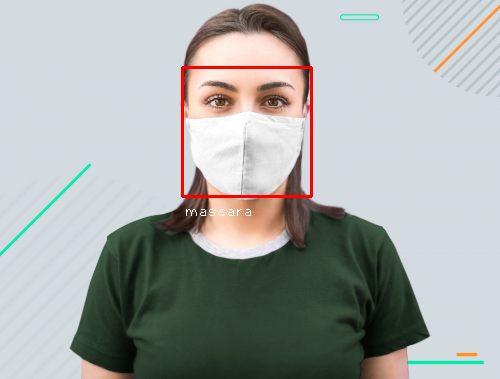

1


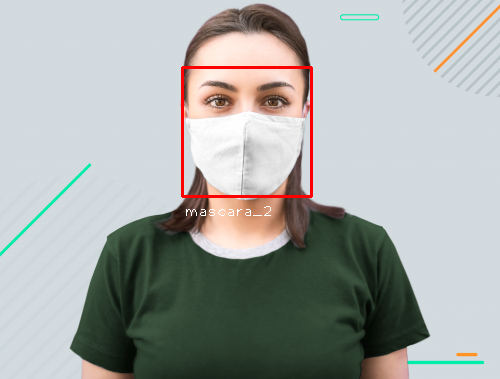

2
0
1
2
0
1
2
0


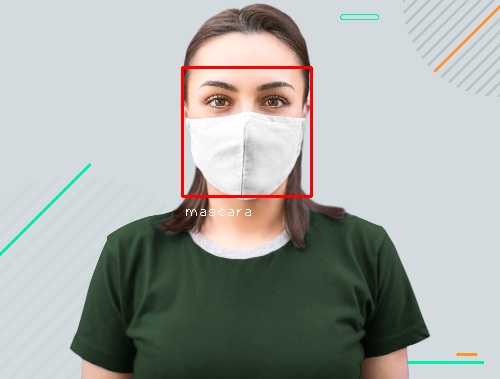

1


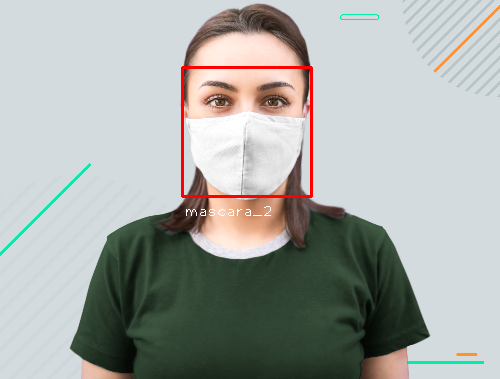

2
0
1
2
0
1


In [ ]:
unknown_dir = 'desconhecidos'

for file in os.listdir(unknown_dir):
  if (file.split('.')[1] == 'ipynb_checkpoints'):
    continue
  img = read_img(unknown_dir + '/' + file)
  img_enc = face_recognition.face_encodings(img)[0]

  results = face_recognition.compare_faces(known_encoding, img_enc)
  # print(face_recognition.face_distance(known_encodings, img_enc))
  print(len(results))
  for i in range(len(results)):
    print(i)
    if results[i]:
      name = known_names[i]
      (top, right, bottom, left) = face_recognition.face_locations(img)[0]
      cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
      cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1)
      cv2_imshow(img)